In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(".."))
from pathlib import Path
from scripts.download_weather_data import fetch_nasa_power_weather
from scripts.plant_config import plant_config

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

In [2]:
# Read plant parameters from config file
data_path = Path("../data")
file_name = "weather_data.csv"
config = plant_config

In [3]:
config

{'latitude': 48.14951,
 'longitude': 11.56999,
 'elevation': 516,
 'capacity_kwp': 3,
 'n_modules': 12,
 'module_area': 1.67,
 'tilt': 30,
 'azimuth': 200}

In [5]:
# Download weather data from NASA POWER API
parameters = ("T2M", "RH2M", "WS2M", "WD2M", "PS", "CLOUD_AMT")
df_weather = fetch_nasa_power_weather(
    latitude=config['latitude'],
    longitude=config['longitude'],
    parameters=parameters,
    start="20190101",
    end="20191231"
)


Requesting data from: https://power.larc.nasa.gov/api/temporal/hourly/point?parameters=T2M,RH2M,WS2M,WD2M,PS,CLOUD_AMT&community=RE&longitude=11.56999&latitude=48.14951&start=20190101&end=20191231&format=JSON&user=demo


In [6]:
df_weather.head()

,datetime,temperature,humidity,wind_speed,wind_direction,mean_sea_level_pressure,cloudiness
0,2019-01-01 12:00:00+00:00,0.68,99.13,1.32,267.8,95.87,0.6756
1,2019-01-01 12:00:00+00:00,0.70,97.21,3.28,276.3,95.06,0.9255
2,2019-01-01 12:00:00+00:00,0.86,96.11,3.48,269.5,95.08,0.8779
3,2019-01-01 12:00:00+00:00,0.95,95.51,3.58,263.1,95.10,0.8691
4,2019-01-01 12:00:00+00:00,0.99,95.51,3.57,260.3,95.14,0.8695


In [7]:
df_weather.shape

(8760, 7)

In [ ]:
# Save the weather data to a CSV file
df_weather.to_csv(data_path / file_name, index=False)

### Read downloaded file

In [4]:
# Read CSV file for data exploration
df_weather = pd.read_csv(data_path / file_name, parse_dates=["datetime"])

In [5]:
df_weather.head()

,datetime,temperature,humidity,wind_speed,wind_direction,mean_sea_level_pressure,cloudiness
0,2019-01-01 12:00:00+00:00,0.68,99.13,1.32,267.8,95.87,0.6756
1,2019-01-01 12:00:00+00:00,0.70,97.21,3.28,276.3,95.06,0.9255
2,2019-01-01 12:00:00+00:00,0.86,96.11,3.48,269.5,95.08,0.8779
3,2019-01-01 12:00:00+00:00,0.95,95.51,3.58,263.1,95.10,0.8691
4,2019-01-01 12:00:00+00:00,0.99,95.51,3.57,260.3,95.14,0.8695


In [6]:
# Statistics of the weather data
df_weather.describe()


,temperature,humidity,wind_speed,wind_direction,mean_sea_level_pressure,cloudiness
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,9.110645,82.982162,1.197481,196.571473,94.403884,0.700163
std,8.521892,15.557283,0.711975,91.294034,0.844173,0.354706
min,-11.940000,28.170000,0.020000,0.000000,91.100000,0.000000
25%,2.390000,72.607500,0.730000,108.675000,93.930000,0.418100
50%,8.530000,88.445000,1.010000,224.500000,94.470000,0.896150
75%,15.750000,96.002500,1.490000,267.100000,94.900000,0.992200
max,35.440000,100.000000,5.450000,359.500000,96.570000,1.000000


In [7]:
# Check for missing values
df_weather.isnull().sum()

datetime                   0
temperature                0
humidity                   0
wind_speed                 0
wind_direction             0
mean_sea_level_pressure    0
cloudiness                 0
dtype: int64

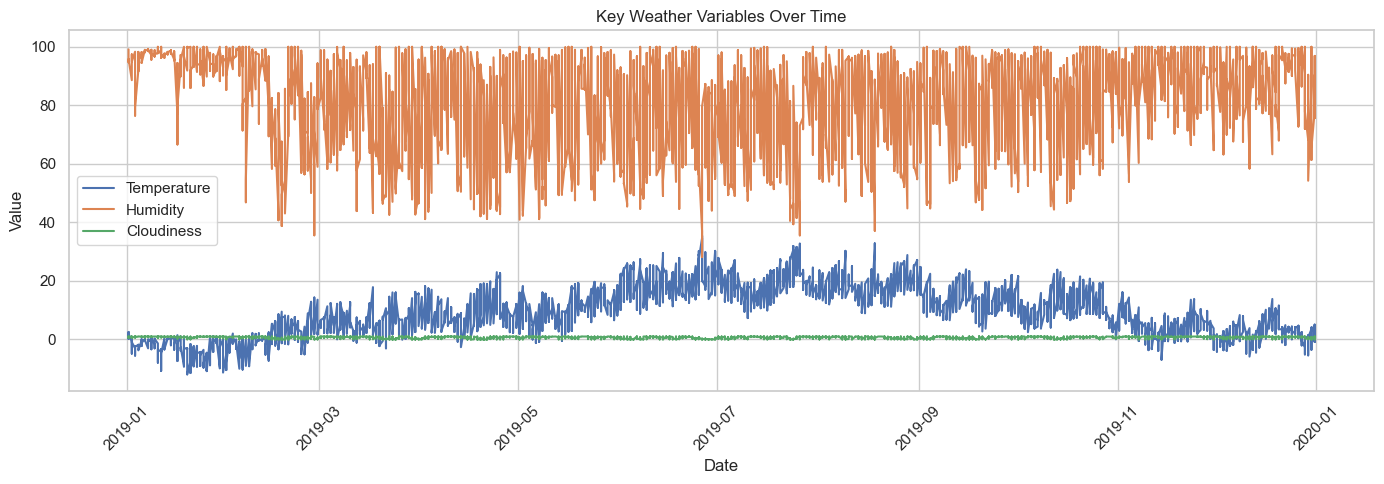

In [8]:
# Time series plot of temperature, humidity, and cloudiness (if available)
plt.figure(figsize=(14, 5))
for col in ["temperature", "humidity", "cloudiness"]:
    if col in df_weather.columns:
        plt.plot(df_weather["datetime"], df_weather[col], label=col.capitalize())
plt.legend()
plt.title("Key Weather Variables Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


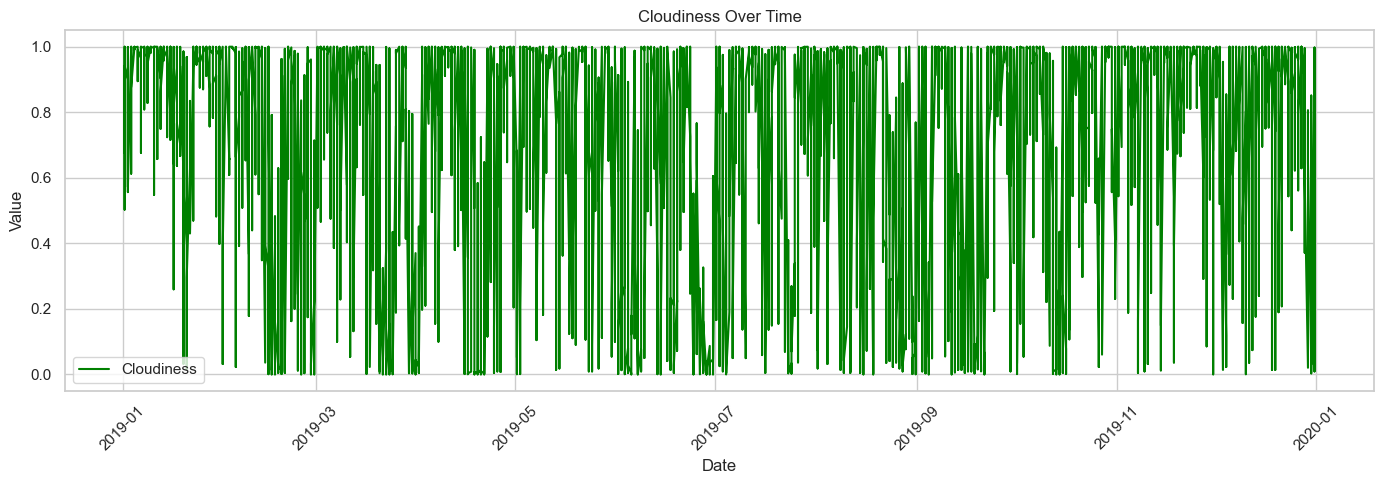

In [9]:
# Time series plot of temperature, humidity, and cloudiness (if available)
plt.figure(figsize=(14, 5))
plt.plot(df_weather["datetime"], df_weather["cloudiness"], label=col.capitalize(), color='green')
plt.legend()
plt.title("Cloudiness Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

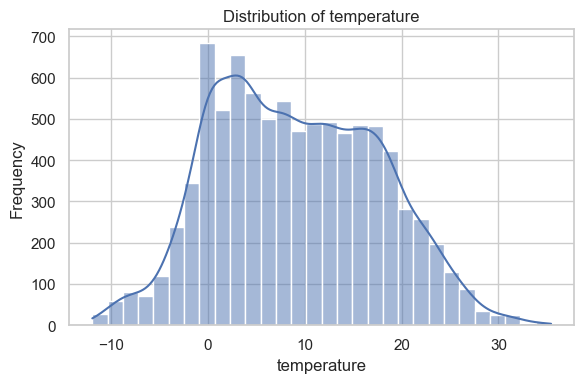

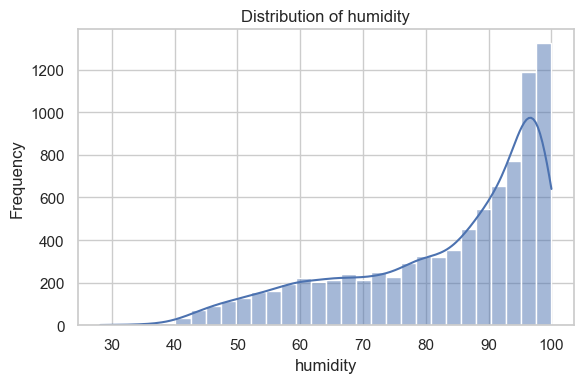

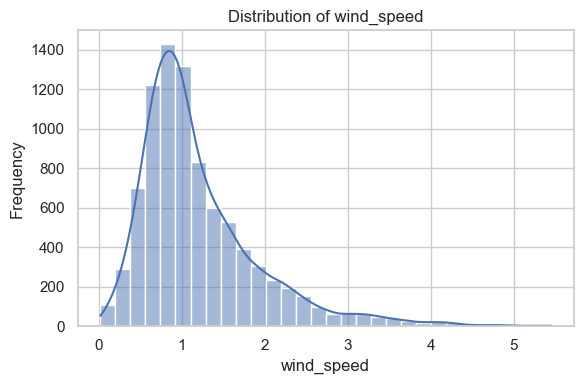

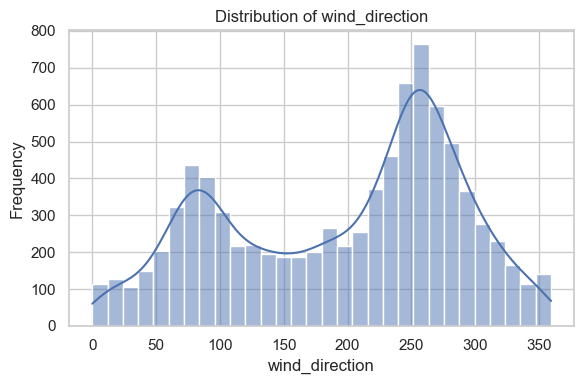

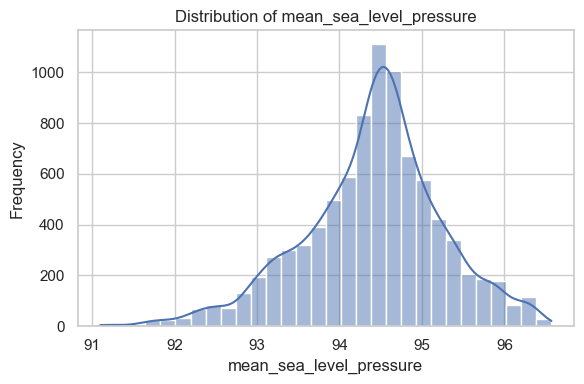

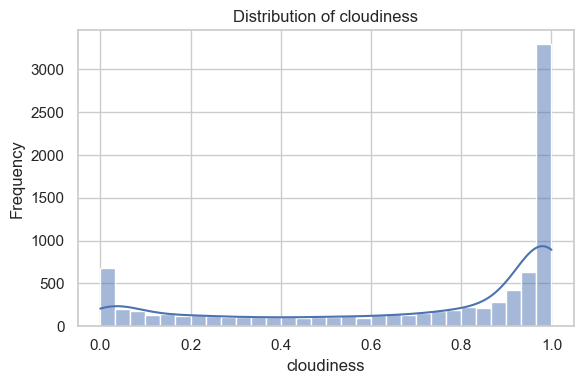

In [10]:
# Distribution plots for all numeric features
numeric_cols = df_weather.select_dtypes(include=["number"]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_weather[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

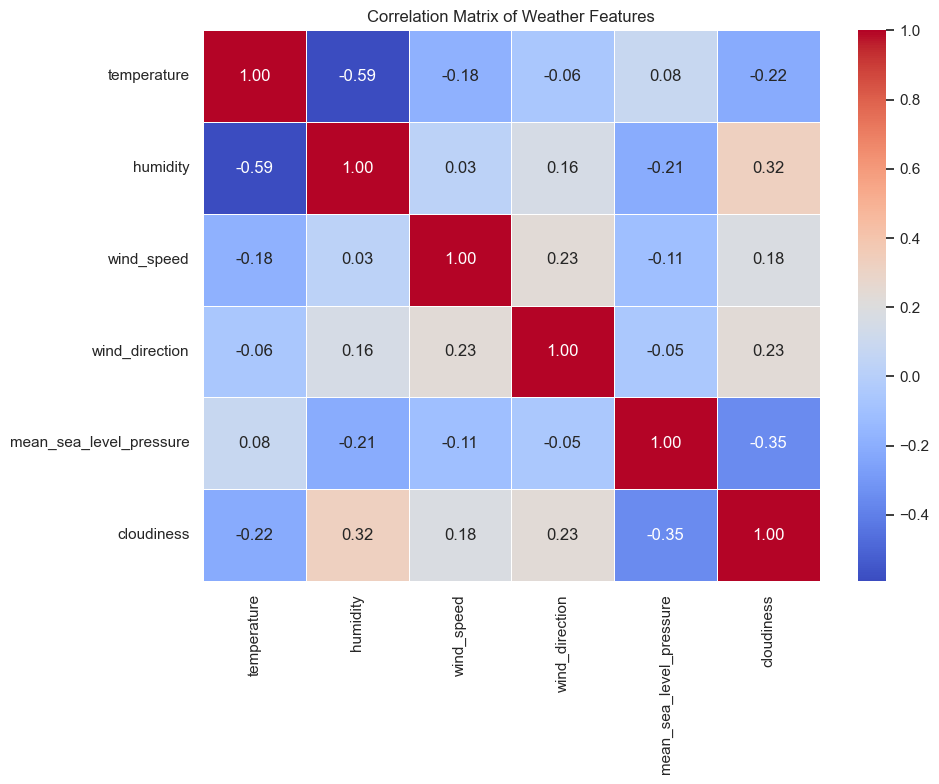

In [11]:
# Correlation matrix and heatmap (if >1 numeric columns)
if len(numeric_cols) > 1:
    corr_matrix = df_weather[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Weather Features")
    plt.tight_layout()
    plt.show()

### Temporal Analysis
Hourly × Monthly heatmaps for temperature, humidity, and cloudiness reveal daily and seasonal trends.

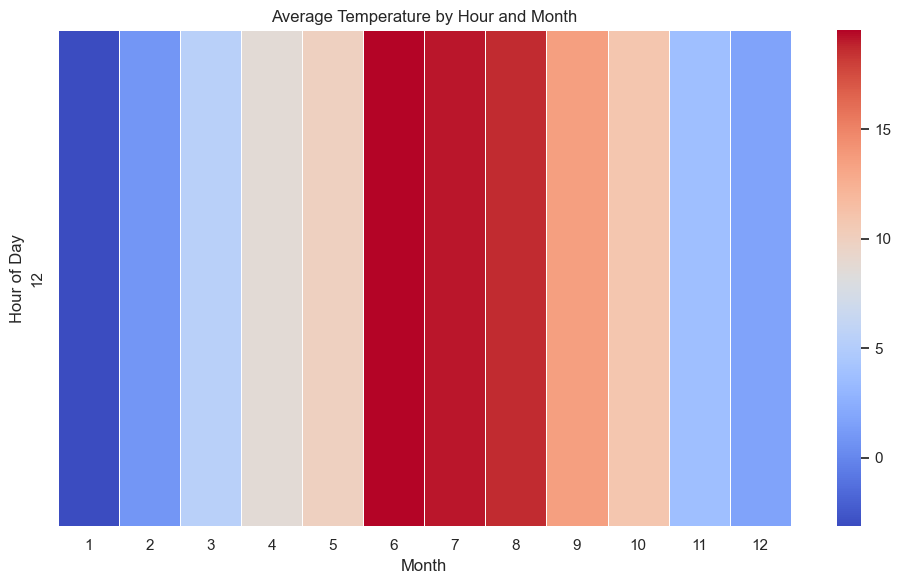

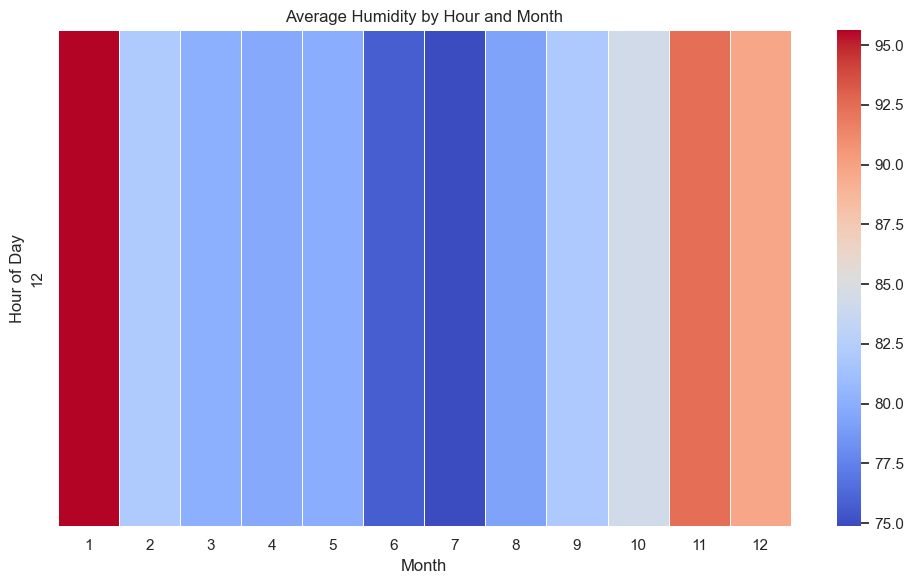

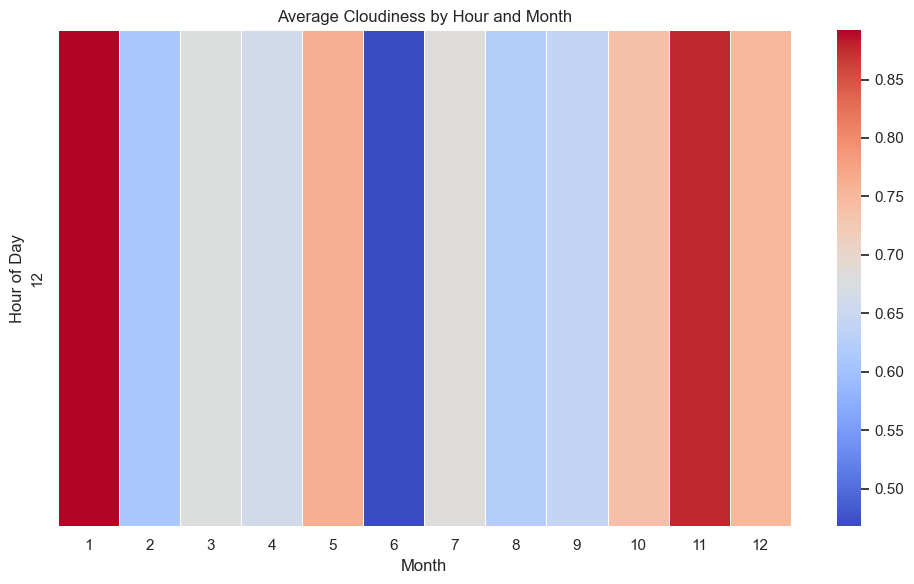

In [12]:
# Extract hour and month from datetime
df_weather["hour"] = df_weather["datetime"].dt.hour
df_weather["month"] = df_weather["datetime"].dt.month

# Generate heatmaps for features by hour and month
for col in ["temperature", "humidity", "cloudiness"]:
    if col in df_weather.columns:
        pivot = df_weather.pivot_table(index="hour", columns="month", values=col, aggfunc="mean")
        plt.figure(figsize=(10, 6))
        sns.heatmap(pivot, cmap="coolwarm", annot=False, linewidths=0.5)
        plt.title(f"Average {col.capitalize()} by Hour and Month")
        plt.xlabel("Month")
        plt.ylabel("Hour of Day")
        plt.tight_layout()
        plt.show()

#### Rolling Averages:
Smooths out noise in raw sensor data using a 6-hour rolling average.

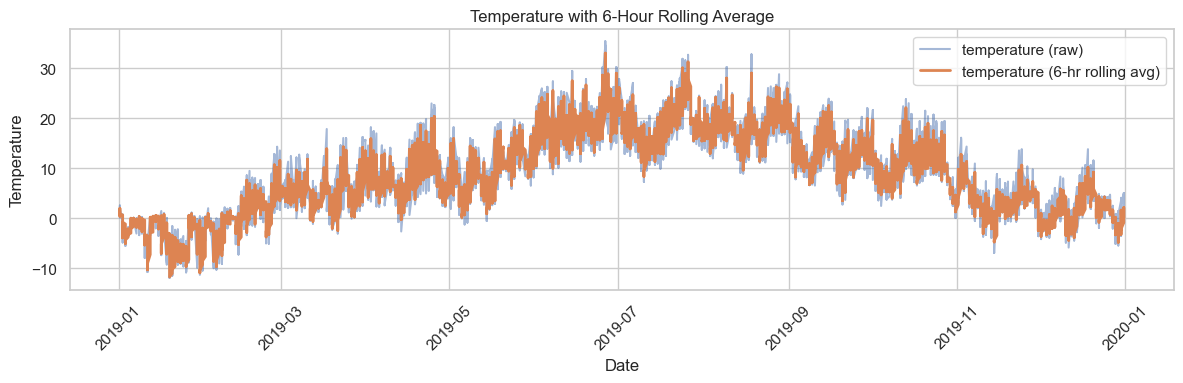

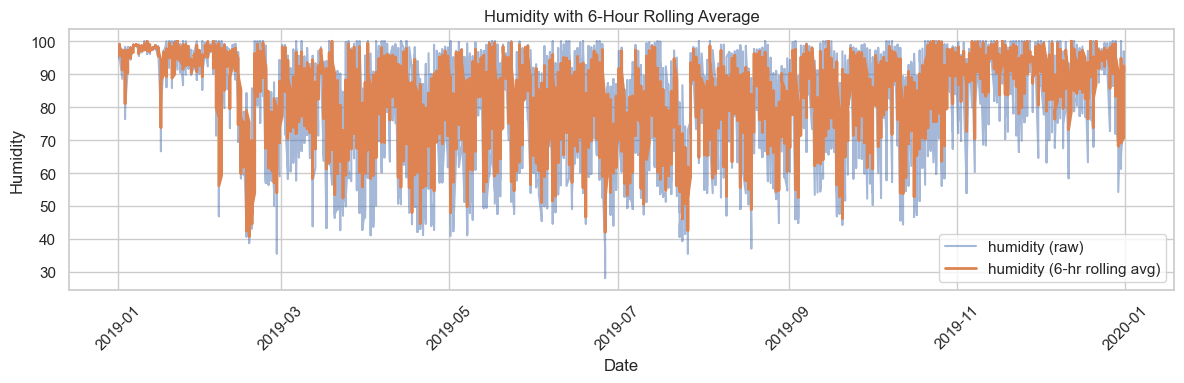

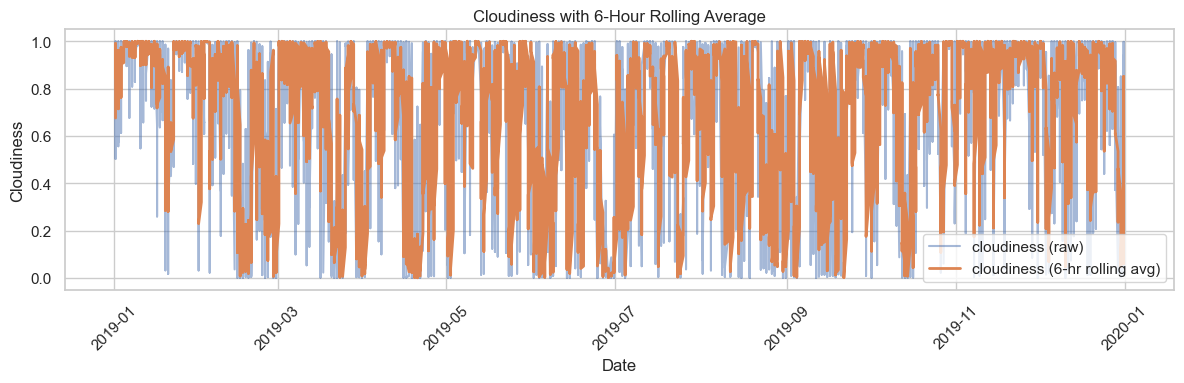

In [13]:
# Compute rolling averages for select features
for col in ["temperature", "humidity", "cloudiness"]:
    if col in df_weather.columns:
        df_weather[f"{col}_rolling"] = df_weather[col].rolling(window=6, min_periods=1).mean()

# Plot raw vs rolling average
for col in ["temperature", "humidity", "cloudiness"]:
    if f"{col}_rolling" in df_weather.columns:
        plt.figure(figsize=(12, 4))
        plt.plot(df_weather["datetime"], df_weather[col], label=f"{col} (raw)", alpha=0.5)
        plt.plot(df_weather["datetime"], df_weather[f"{col}_rolling"], label=f"{col} (6-hr rolling avg)", linewidth=2)
        plt.title(f"{col.capitalize()} with 6-Hour Rolling Average")
        plt.xlabel("Date")
        plt.ylabel(col.capitalize())
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

#### Outlier Detection:
Detected using the IQR method for each numeric feature. Helps identify sensor errors, extreme weather events, or unusual patterns that might skew model training.


In [14]:
# Identify numeric columns
numeric_cols = df_weather.select_dtypes(include=["number"]).columns

# Detect and store outliers using IQR
outliers = {}
for col in numeric_cols:
    Q1 = df_weather[col].quantile(0.25)
    Q3 = df_weather[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = (df_weather[col] < (Q1 - 1.5 * IQR)) | (df_weather[col] > (Q3 + 1.5 * IQR))
    outliers[col] = df_weather.loc[mask, ["datetime", col]]

# Display outliers
for name, df_outlier in outliers.items():
    if not df_outlier.empty:
        print(f"\nOutliers in {name}:")
        print(df_outlier.head())


Outliers in humidity:
                      datetime  humidity
1374 2019-02-27 12:00:00+00:00     36.77
1379 2019-02-27 12:00:00+00:00     35.58
4224 2019-06-26 12:00:00+00:00     36.94
4228 2019-06-26 12:00:00+00:00     36.21
4234 2019-06-26 12:00:00+00:00     32.44

Outliers in wind_speed:
                   datetime  wind_speed
1 2019-01-01 12:00:00+00:00        3.28
2 2019-01-01 12:00:00+00:00        3.48
3 2019-01-01 12:00:00+00:00        3.58
4 2019-01-01 12:00:00+00:00        3.57
5 2019-01-01 12:00:00+00:00        3.50

Outliers in mean_sea_level_pressure:
                     datetime  mean_sea_level_pressure
528 2019-01-23 12:00:00+00:00                    92.28
529 2019-01-23 12:00:00+00:00                    92.29
530 2019-01-23 12:00:00+00:00                    92.34
531 2019-01-23 12:00:00+00:00                    92.46
532 2019-01-23 12:00:00+00:00                    92.28

Outliers in humidity_rolling:
                      datetime  humidity_rolling
1108 2019-02-16 12

#### Seasonal Analysis

In [15]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"

df_weather["month"] = df_weather["datetime"].dt.month
df_weather["season"] = df_weather["month"].apply(get_season)

Boxplots help identify how wide and skewed feature distributions are per season.

/var/folders/wn/5hltvcvs3qg_bl9q2vw70c9r0000gn/T/ipykernel_14491/3141912092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_weather, x="season", y=col, palette="Set2")


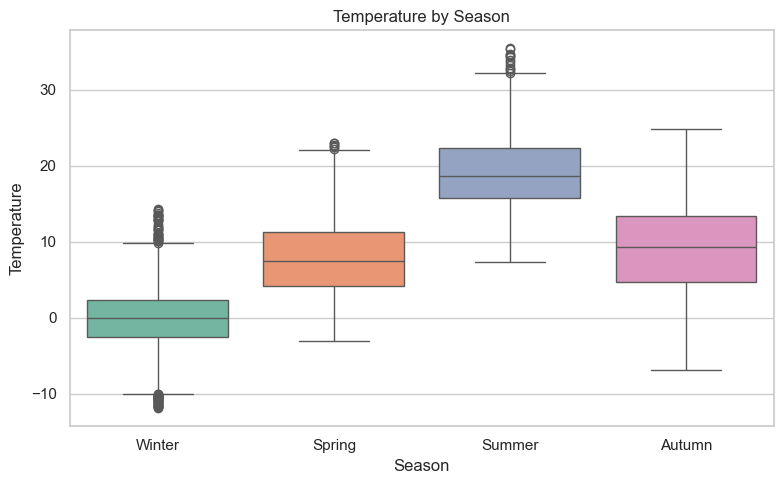

/var/folders/wn/5hltvcvs3qg_bl9q2vw70c9r0000gn/T/ipykernel_14491/3141912092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_weather, x="season", y=col, palette="Set2")


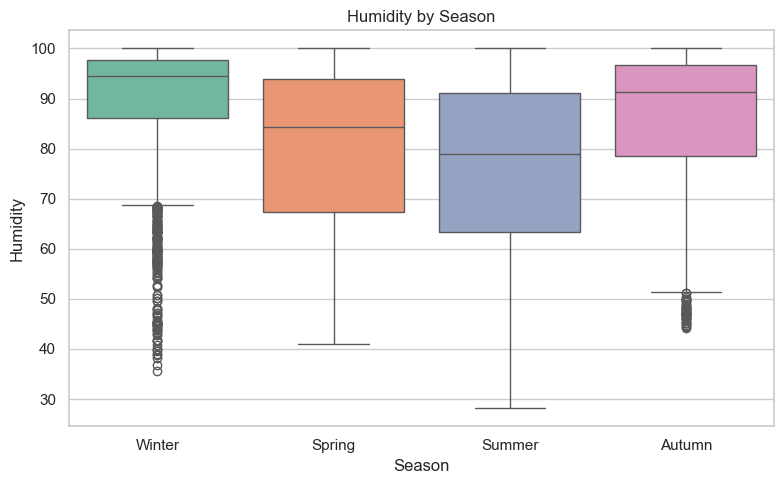

/var/folders/wn/5hltvcvs3qg_bl9q2vw70c9r0000gn/T/ipykernel_14491/3141912092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_weather, x="season", y=col, palette="Set2")


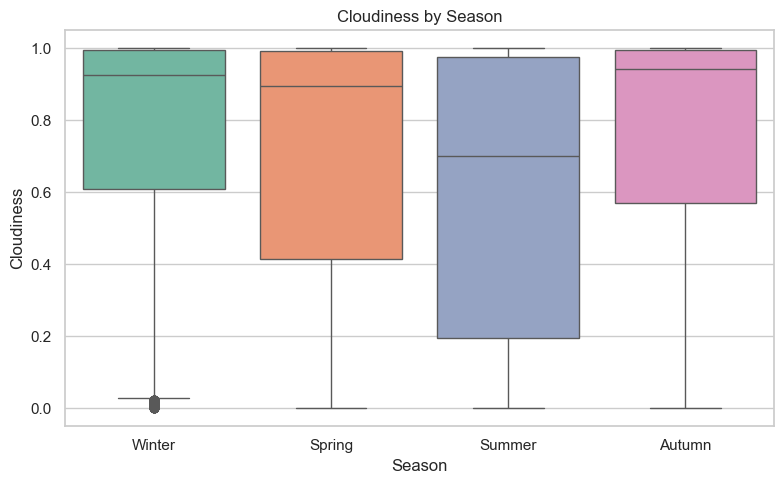

In [16]:
# Seasonal boxplots
seasonal_cols = ["temperature", "humidity", "cloudiness"]
for col in seasonal_cols:
    if col in df_weather.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df_weather, x="season", y=col, palette="Set2")
        plt.title(f"{col.capitalize()} by Season")
        plt.ylabel(col.capitalize())
        plt.xlabel("Season")
        plt.tight_layout()
        plt.show()

- Temperature: Highest median and upper quartile in Summer. Coldest temperatures with wider range in Winter, Outliers observed in both extremes (cold snaps, heat spikes)
- Humidity: Winter shows highest average and narrower range (more humid air). Summer has lower humidity but wider spread
- Cloudiness: Winter and Autumn tend to have higher cloudiness. Summer generally clearer but with greater variability

#### Seasonal Average Heatmap by Hour
Heatmaps show time-of-day effects for each season.

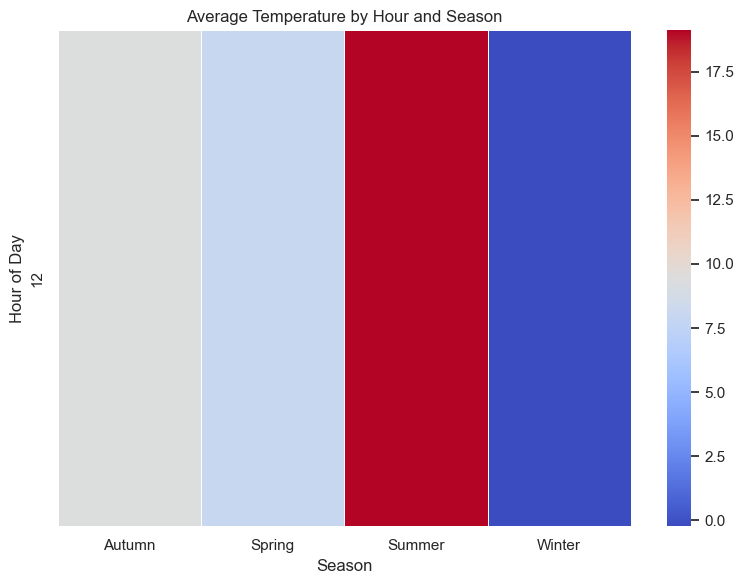

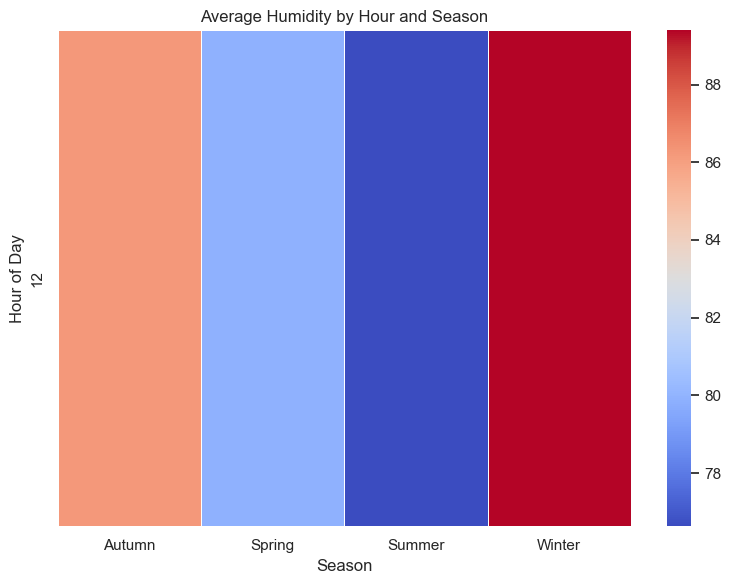

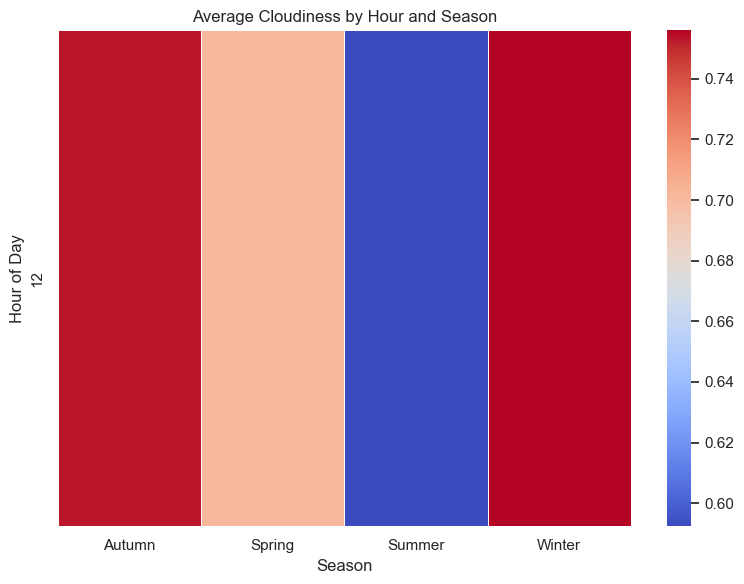

In [17]:
df_weather["hour"] = df_weather["datetime"].dt.hour
for col in ["temperature", "humidity", "cloudiness"]:
    if col in df_weather.columns:
        pivot = df_weather.pivot_table(index="hour", columns="season", values=col, aggfunc="mean")
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot, cmap="coolwarm", annot=False, linewidths=0.5)
        plt.title(f"Average {col.capitalize()} by Hour and Season")
        plt.xlabel("Season")
        plt.ylabel("Hour of Day")
        plt.tight_layout()
        plt.show()

- Temperature: From the data, temperatures peak around 14:00–16:00 and Coldest around 05:00–07:00. Daily temperature amplitude is largest in Summer
- Humidity: Based on the dataframe, humidity is consistently higher in early morning hour and Drops significantly by midday, particularly in Summer.
- Cloudiness: From the dataframe, cloudiness is more uniform throughout the day, though slightly higher in morning and late afternoon. Autumn and Winter show consistently higher average cloud cover.